# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM 

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20200414.h5ad')

In [4]:
adata.raw = adata

In [5]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T                        327
CD8 T                        171
CD14 monocyte               8787
CD56 bright NK               540
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
EI macrophage                 92
ELP                         1358
GMP                         1285
HSC                           92
ILC precursor                 67
Immature B cell             1998
MEMP                          16
MEP                          269
MK                          1036
MPP lymphoid                  34
MPP myeloid 1                 46
MPP myeloid 2                 46
NKT                          137
Naive B cell                1423
Pre B progenitor           14234
Pre pro B progenitor        5428
Pro B progenitor            5530
Treg                          62
adipo-CAR                    359
arteriolar fibroblast         84
basophil                     13

In [6]:
celltypes = ['HSC', 'MEMP', 'MEP', 'early erythroid']

In [7]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [8]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                  92
MEMP                 16
MEP                 269
early erythroid    7534
dtype: int64

In [9]:
cell_numbers = adata.obs.groupby(["fetal.ids"]).apply(len)
cell_numbers

fetal.ids
F21_male_16+2PCW       517
F29_female_17+0PCW     530
F30_male_14+3PCW       616
F38_male_12PCW         202
F41_female_16PCW      1326
F45_female_13+6PCW     292
F50_female_15PCW      1811
F51_female_15PCW      1981
SB19PCW                636
dtype: int64

In [10]:
adata = adata[adata.obs['fetal.ids'].isin(["F38_male_12PCW", "F45_female_13+6PCW"])].copy()

In [11]:
adata.obs['cell.labels'] = adata.obs['cell.labels'].replace(["MEP", "MEMP"], ["MEP_MEMP", "MEP_MEMP"])

In [12]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                 15
MEP_MEMP            27
early erythroid    452
dtype: int64

In [13]:
cell_numbers = adata.obs.groupby(["fetal.ids"]).apply(len)
cell_numbers

fetal.ids
F38_male_12PCW        202
F45_female_13+6PCW    292
dtype: int64

In [14]:
adata.shape

(494, 33712)

# Pre-process the dataset

In [15]:
# normalise count data 
sc.pp.normalize_total(adata)

In [16]:
# log the count data 
sc.pp.log1p(adata)

In [17]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [18]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [19]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [20]:
# run pca
sc.tl.pca(adata, n_comps=50)

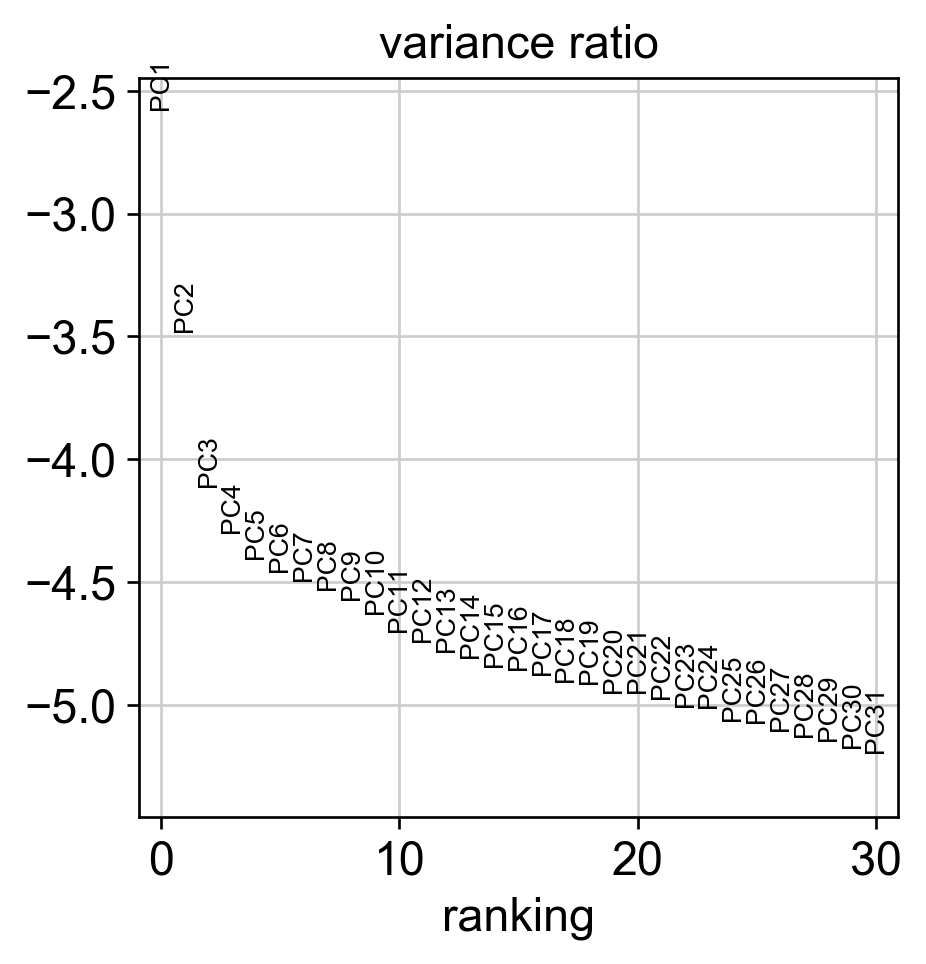

In [21]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [22]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [23]:
# run umap
sc.tl.umap(adata) 

... storing 'cell.labels' as categorical


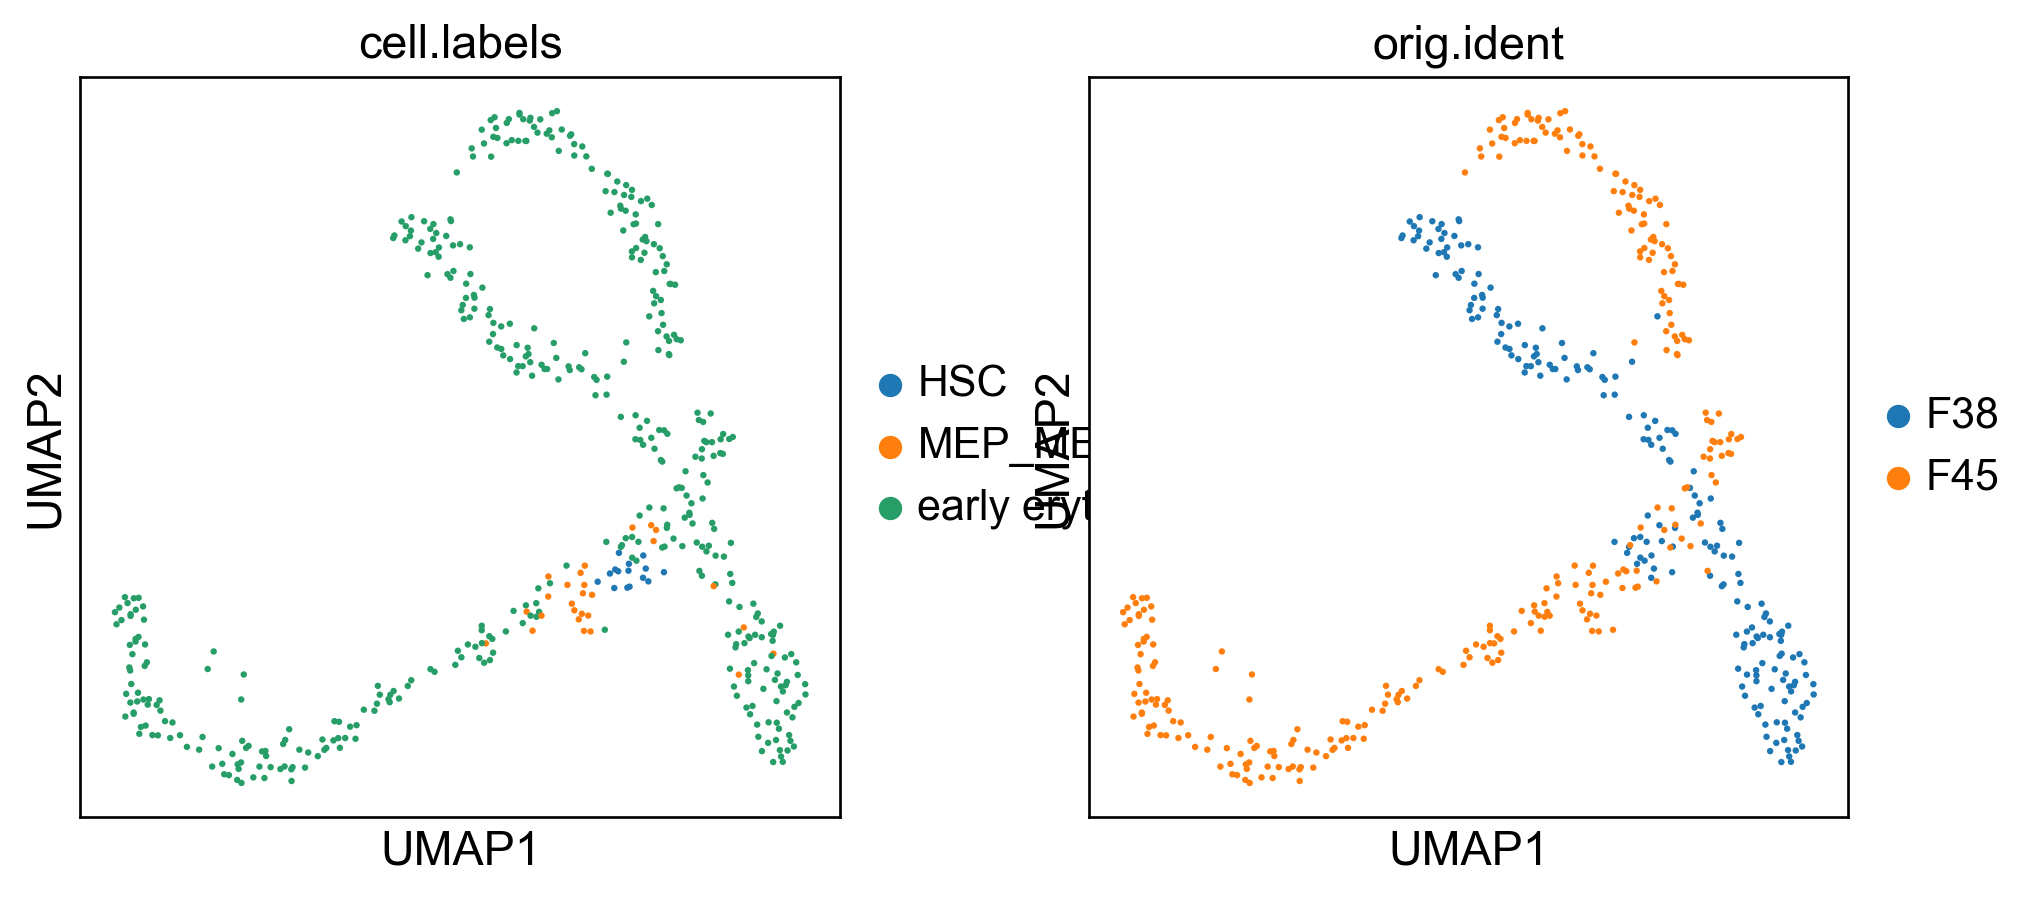

In [24]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

# Run harmony batch correction

In [25]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [26]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [27]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

In [28]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add dimensional reduction post-harmony

In [29]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [30]:
# run umap
sc.tl.umap(adata) 

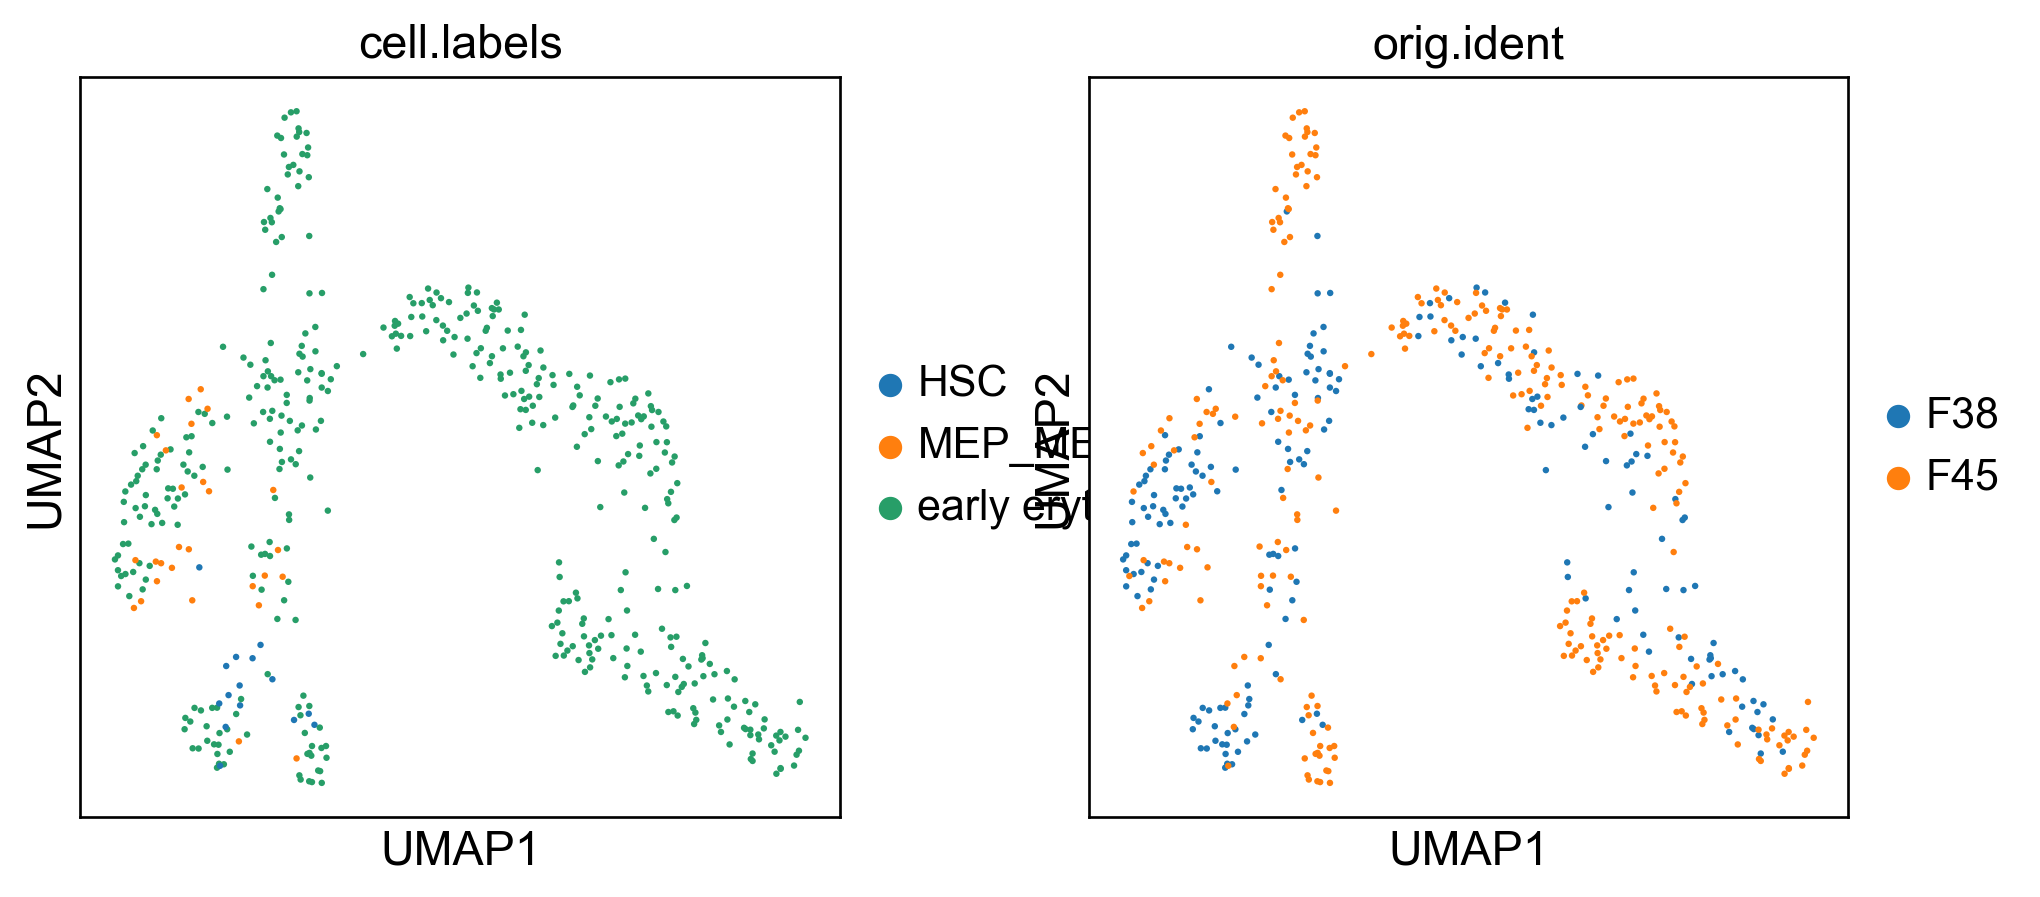

In [31]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

In [32]:
# run fdg 
# As an input, FDG requires PCA coordinates and a snn graph. must redo snn graph if re-running fdg on subsets 
sc.tl.draw_graph(adata, init_pos='X_pca', layout='fa')

# Change the colours 

In [33]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['HSC', 'MEP_MEMP', 'early erythroid'], dtype='object')

In [34]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].cat.reorder_categories(['HSC', 'MEP_MEMP',  
                'early erythroid'])

In [35]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['HSC', 'MEP_MEMP', 'early erythroid'], dtype='object')

In [36]:
adata.obs["cell.labels"].cat.categories[2]

'early erythroid'

In [37]:
new_colors = np.array(adata.uns["cell.labels_colors"])

new_colors[[0]] = '#d200d2' # HSC
new_colors[[1]] = '#00a500' # MEP_MEMP
new_colors[[2]] = '#cbcbff' # early erythroid
adata.uns["cell.labels_colors"] = new_colors

new_colors

array(['#d200d2', '#00a500', '#cbcbff'], dtype='<U7')

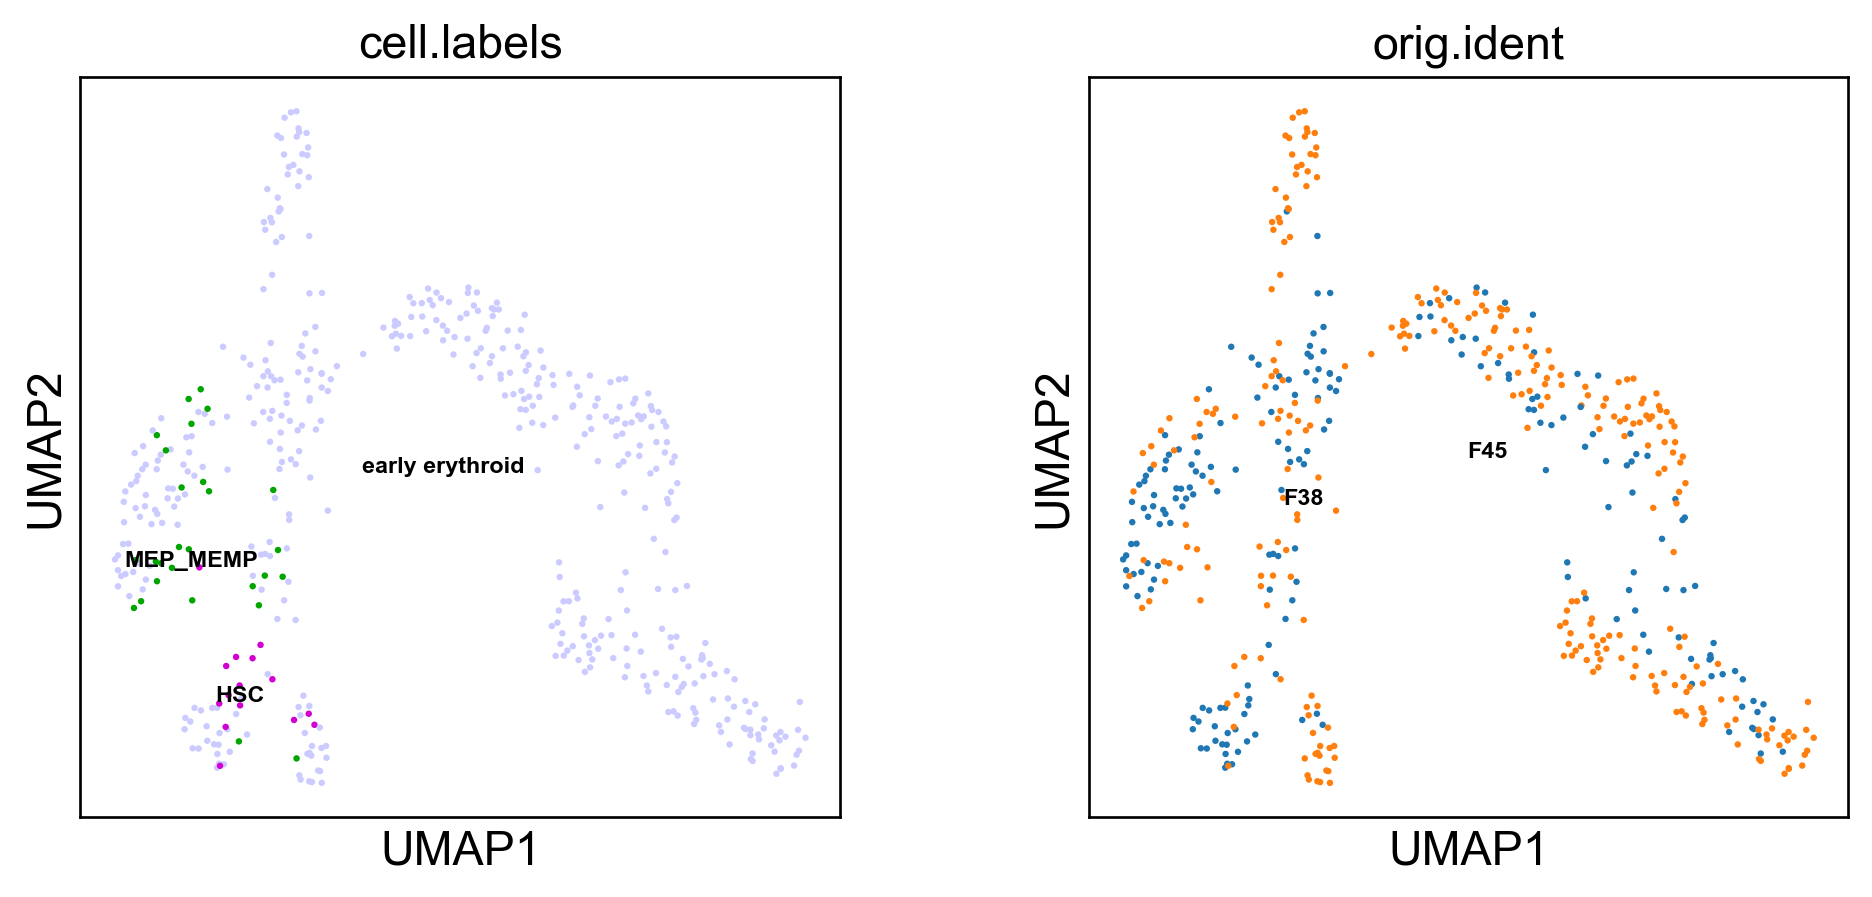

In [38]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15, legend_loc="on data", legend_fontsize=7) 

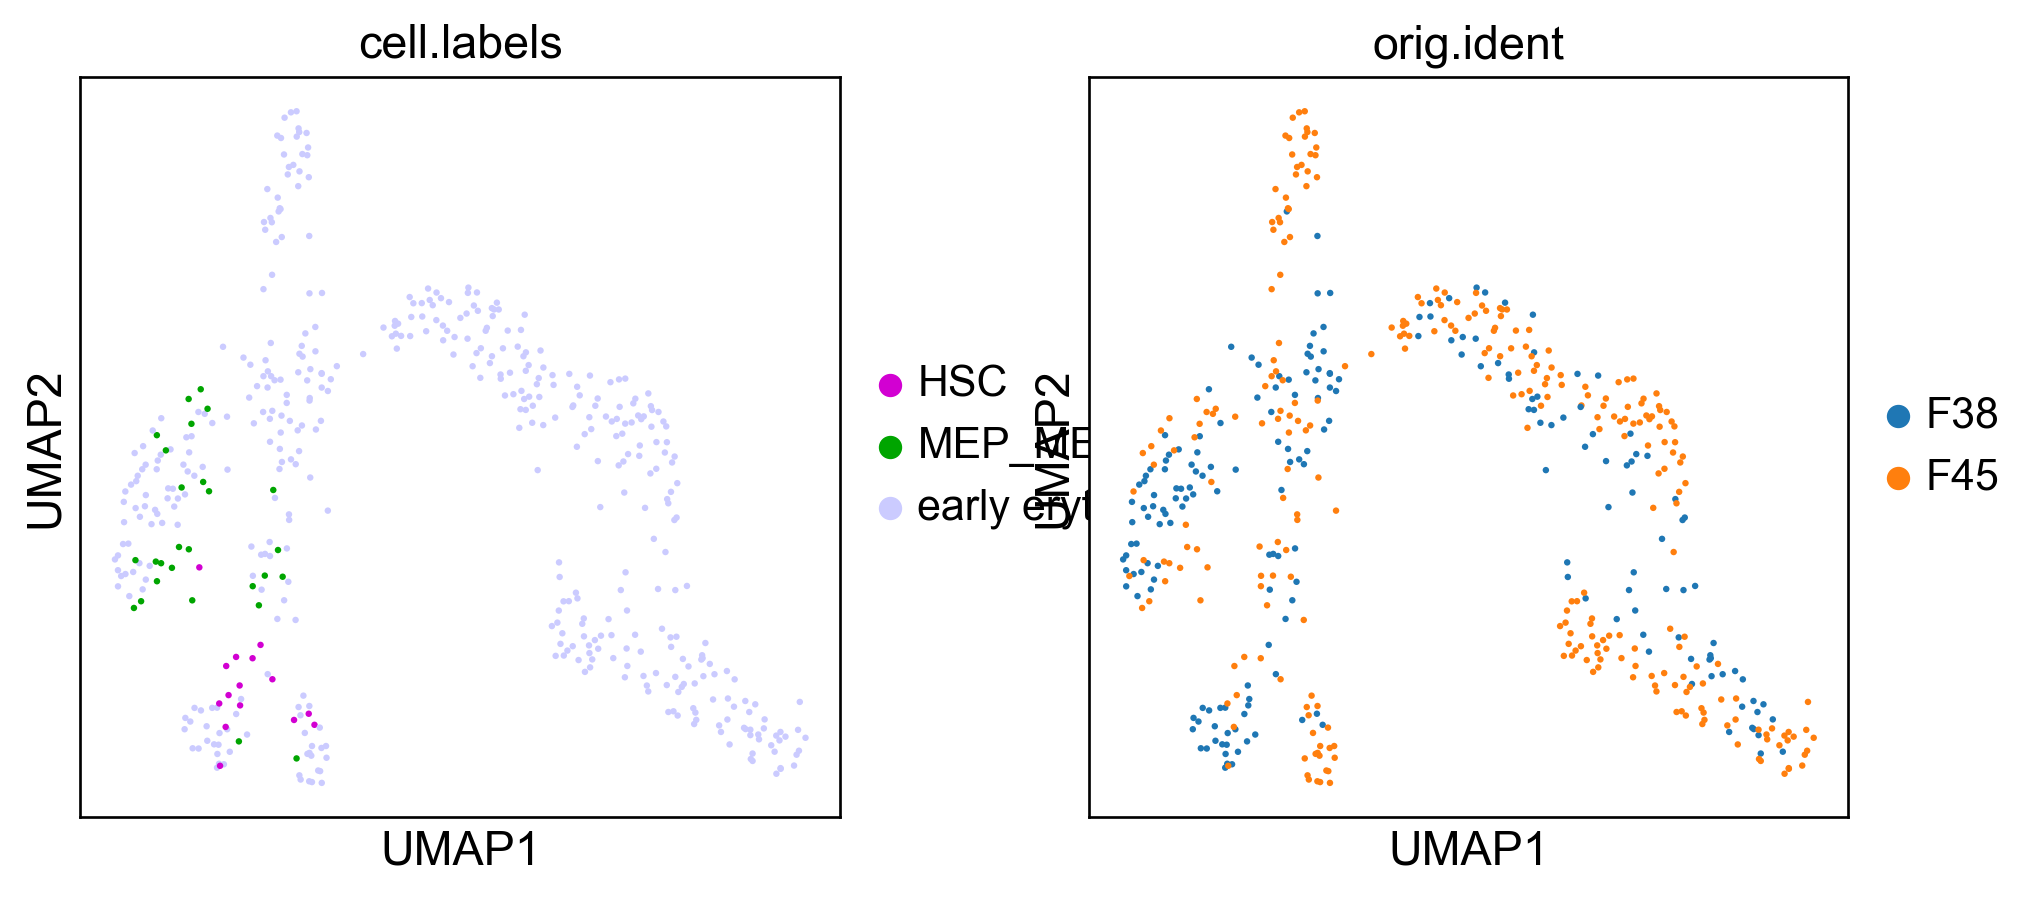

In [39]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

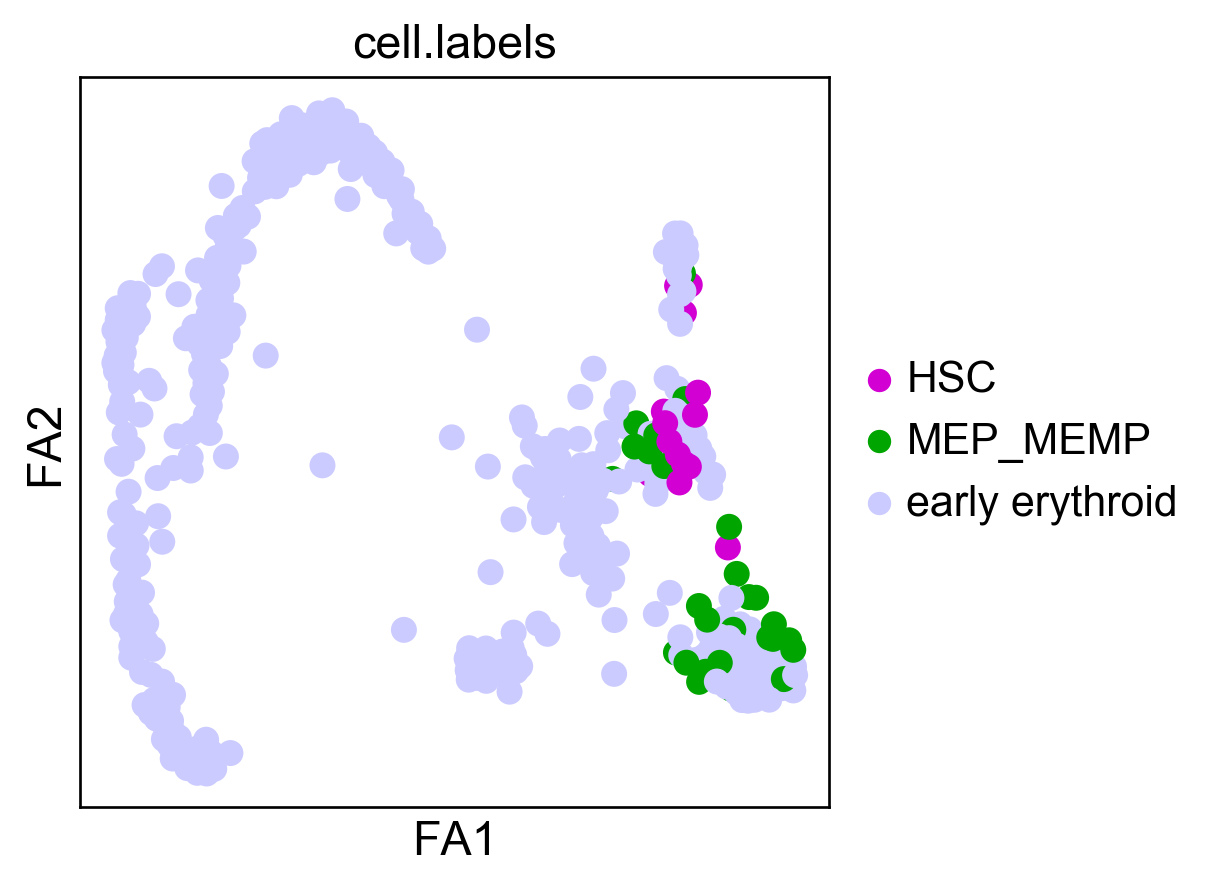

In [40]:
sc.pl.draw_graph(adata, color='cell.labels', layout='fa') 

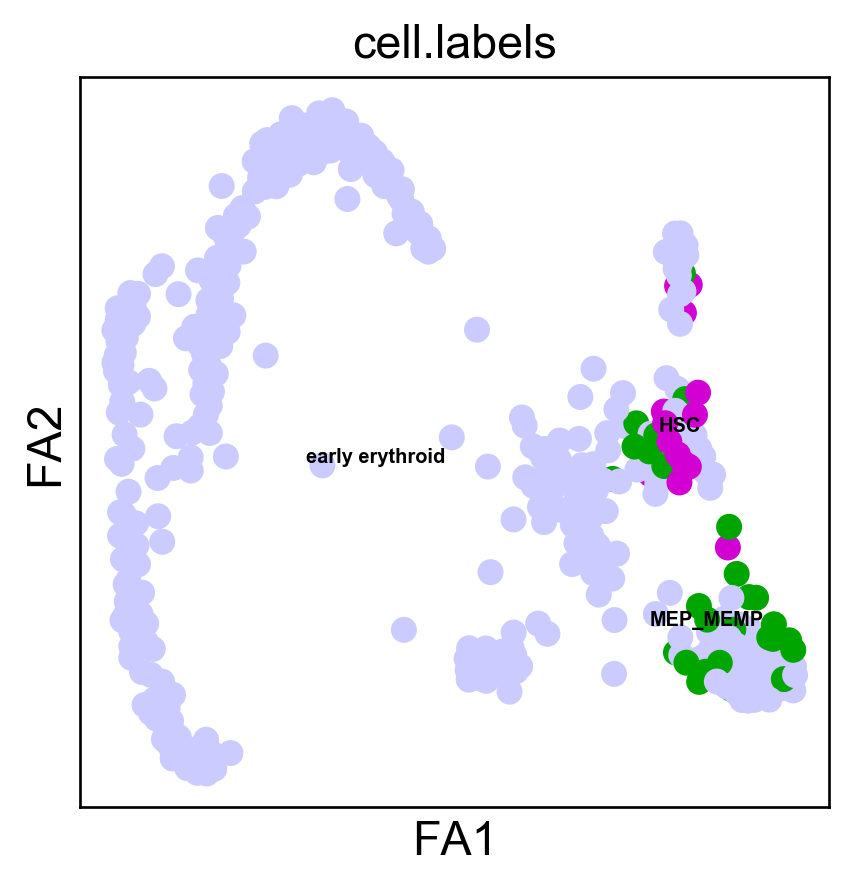

In [41]:
sc.pl.draw_graph(adata, color='cell.labels', legend_loc='on data', legend_fontsize=6) 

# Save plots

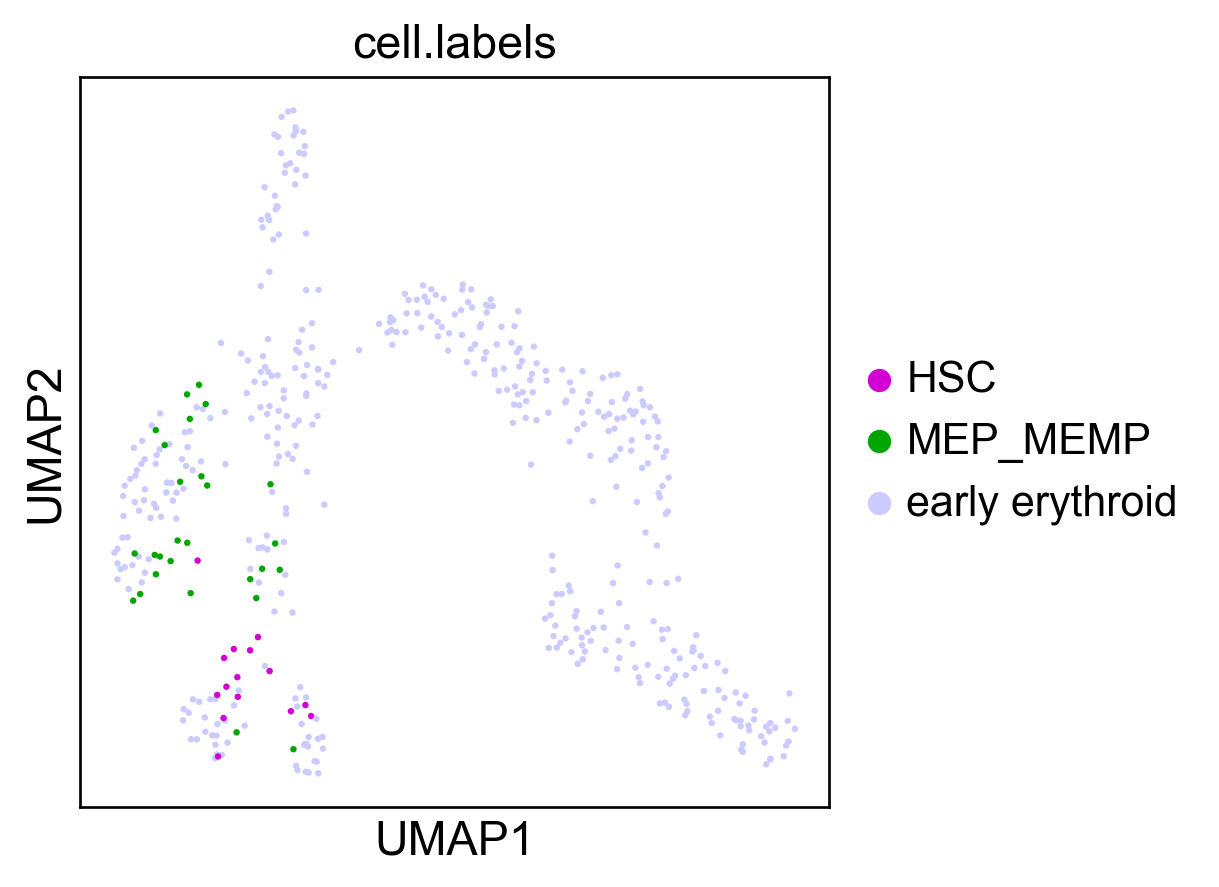

In [42]:
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.umap(adata, color=['cell.labels'], size=15, save="fig5e_5f_fbm_eryth_umap_20200625.pdf") 

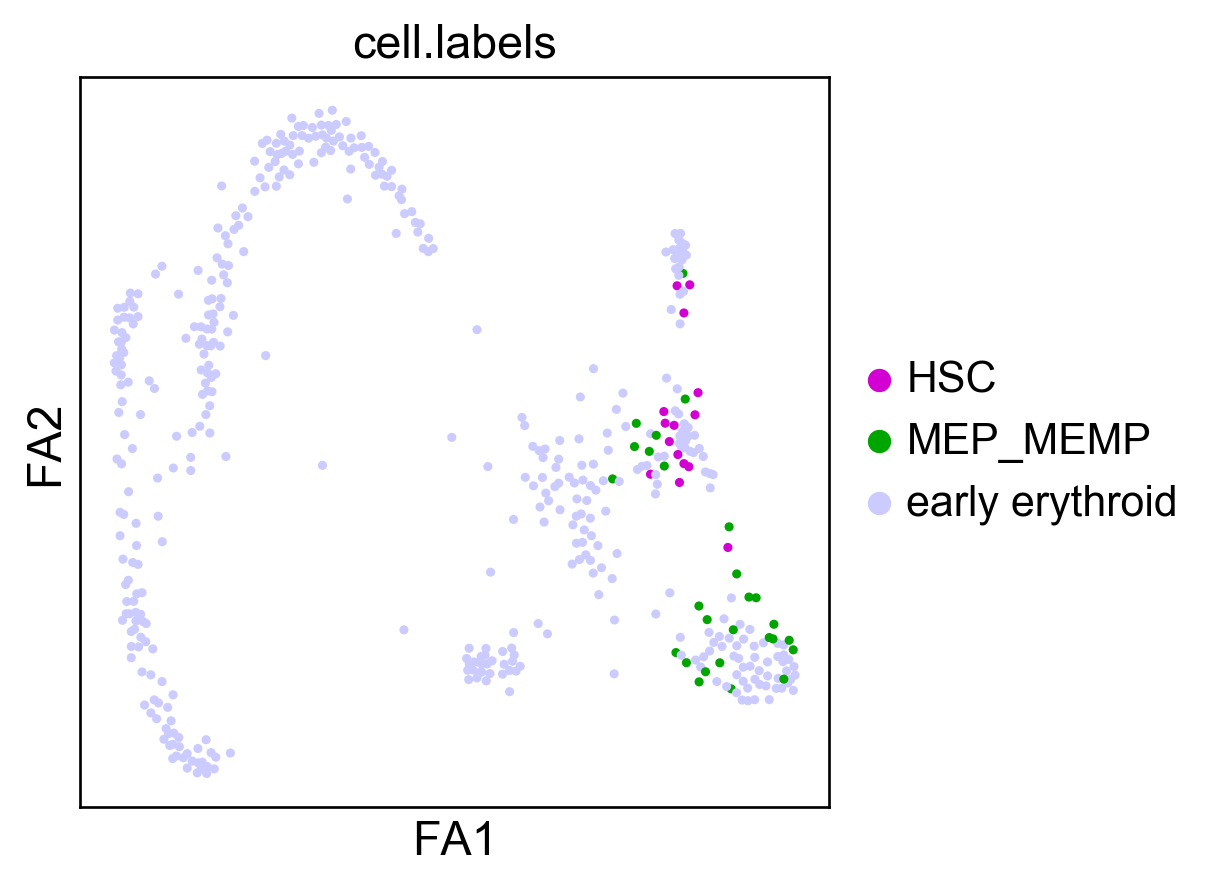

In [43]:
sc.pl.draw_graph(adata, color='cell.labels', layout='fa', show=True, 
                 save='_fig5e_5f_fbm_eryth_fdg_size30_20200625.pdf', 
                 size=30)

# Save the data

In [44]:
from scipy.sparse import csr_matrix
adata.X = scipy.sparse.csr_matrix(adata.X)

In [45]:
adata.X

<494x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 1942429 stored elements in Compressed Sparse Row format>

In [46]:
adata.raw.X

<494x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 2406168 stored elements in Compressed Sparse Row format>

In [47]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig5e_5f_fbm_eryth_dr_20200625.h5ad")